In [1]:
#21: Naïve Bayes for Spam Detection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

emails = ["Free money now", "Hi, how are you?", "Win a prize", "Meeting tomorrow"]
labels = [1, 0, 1, 0]  # 1=spam, 0=not spam

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [2]:
#22: SVM vs Naïve Bayes on the same dataset
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred))

SVM Accuracy: 0.0
Naïve Bayes Accuracy: 1.0


In [5]:
#23: Feature Selection before Naïve Bayes
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=2)
X_new = selector.fit_transform(X, y)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_new, y, test_size=0.25, random_state=42)
nb.fit(X_train_f, y_train_f)
y_pred_f = nb.predict(X_test_f)
print("Accuracy after feature selection:", accuracy_score(y_test_f, y_pred_f))

Accuracy after feature selection: 0.0


In [6]:
#24: SVM One-vs-Rest (OvR) vs One-vs-One (OvO)
from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ovr_svm = OneVsRestClassifier(SVC(kernel='linear'))
ovr_svm.fit(X_train, y_train)
print("OvR Accuracy:", ovr_svm.score(X_test, y_test))

ovo_svm = OneVsOneClassifier(SVC(kernel='linear'))
ovo_svm.fit(X_train, y_train)
print("OvO Accuracy:", ovo_svm.score(X_test, y_test))

OvR Accuracy: 0.9777777777777777
OvO Accuracy: 0.9777777777777777


In [7]:
#25: SVM Linear, Polynomial, RBF kernels comparison on Breast Cancer
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    print(f"{k} kernel Accuracy:", model.score(X_test, y_test))

linear kernel Accuracy: 0.958041958041958
poly kernel Accuracy: 0.9440559440559441
rbf kernel Accuracy: 0.951048951048951


In [8]:
#26: SVM Stratified K-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from sklearn.svm import SVC

skf = StratifiedKFold(n_splits=5)
model = SVC(kernel='linear')
scores = cross_val_score(model, X, y, cv=skf)
print("Average Accuracy:", np.mean(scores))


Average Accuracy: 0.9455364073901569


In [9]:
#27: Naïve Bayes with different prior probabilities
from sklearn.naive_bayes import MultinomialNB

nb1 = MultinomialNB(class_prior=[0.7, 0.3])
nb1.fit(X_train, y_train)
print("Accuracy with priors [0.7,0.3]:", nb1.score(X_test, y_test))

nb2 = MultinomialNB(class_prior=[0.5, 0.5])
nb2.fit(X_train, y_train)
print("Accuracy with priors [0.5,0.5]:", nb2.score(X_test, y_test))


Accuracy with priors [0.7,0.3]: 0.9300699300699301
Accuracy with priors [0.5,0.5]: 0.9300699300699301


In [10]:
#28: Recursive Feature Elimination (RFE) before SVM
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

svm = SVC(kernel='linear')
rfe = RFE(estimator=svm, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rfe, y, test_size=0.25, random_state=42)
svm.fit(X_train_r, y_train_r)
print("Accuracy after RFE:", svm.score(X_test_r, y_test_r))


Accuracy after RFE: 0.8811188811188811


In [11]:
#29: SVM with Precision, Recall, F1-Score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94        54
           1       0.96      0.98      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [13]:
#30: Naïve Bayes with Log Loss
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_prob = nb.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_prob))


Log Loss: 0.9161723130348602


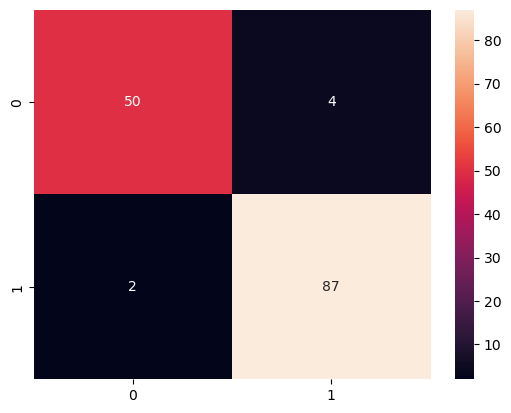

In [14]:
#31: SVM Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


In [15]:
#32: SVM Regressor with Mean Absolute Error
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

housing = fetch_california_housing()
X_h, y_h = housing.data, housing.target
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, test_size=0.25, random_state=42)

svr = SVR(kernel='rbf')
svr.fit(X_train_h, y_train_h)
y_pred_h = svr.predict(X_test_h)
print("MAE:", mean_absolute_error(y_test_h, y_pred_h))


MAE: 0.8674205743031627


In [7]:
#33: Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score


# For binary classification, use only the probability of the positive class
y_prob = nb.predict_proba(X_test)[:, 1]  # probability of class 1

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)





NameError: name 'nb' is not defined

In [19]:
#34: Write a Python program to implement a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("Bernoulli NB Accuracy:", accuracy_score(y_test, y_pred_bnb))



Bernoulli NB Accuracy: 0.6223776223776224


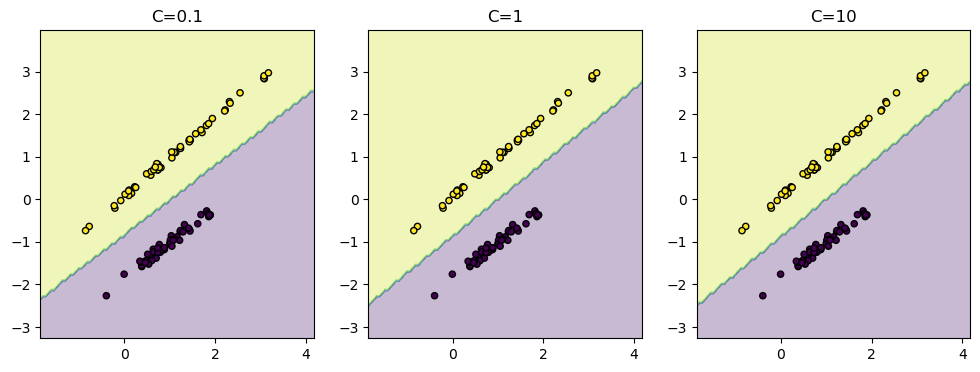

In [20]:
#35: Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X_vis, y_vis = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                   n_clusters_per_class=1, random_state=42)
C_values = [0.1, 1, 10]
plt.figure(figsize=(12,4))

for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X_vis, y_vis)
    plt.subplot(1,3,i+1)
    xx, yy = np.meshgrid(np.linspace(X_vis[:,0].min()-1, X_vis[:,0].max()+1, 100),
                         np.linspace(X_vis[:,1].min()-1, X_vis[:,1].max()+1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, s=20, edgecolor='k')
    plt.title(f"C={C}")
plt.show()


In [21]:
#36: Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
print("Bernoulli NB Accuracy:", bnb.score(X_test, y_test))


Bernoulli NB Accuracy: 0.6223776223776224


In [22]:
#37: Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train_s, y_train_s)
print("Accuracy with scaling:", svm.score(X_test_s, y_test_s))


Accuracy with scaling: 0.9790209790209791


In [23]:
#38: Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(var_smoothing=1e-9)
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

gnb_ls = GaussianNB(var_smoothing=1e-2)
gnb_ls.fit(X_train, y_train)
y_pred2 = gnb_ls.predict(X_test)

print("Accuracy before Laplace smoothing:", accuracy_score(y_test, y_pred1))
print("Accuracy after Laplace smoothing:", accuracy_score(y_test, y_pred2))


Accuracy before Laplace smoothing: 0.958041958041958
Accuracy after Laplace smoothing: 0.9440559440559441


In [24]:
#39: Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C':[0.1,1,10],'gamma':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Best score: 0.9624413145539906


In [30]:
#40: Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Corrected: n_features=2, n_informative=2, n_redundant=0
X_imb, y_imb = make_classification(n_samples=200, n_features=2, n_informative=2, 
                                   n_redundant=0, n_classes=2, weights=[0.9, 0.1], 
                                   random_state=42)
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_imb, y_imb, test_size=0.25, random_state=42)

# SVM with class weighting to handle imbalance
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train_i, y_train_i)
y_pred_i = svm.predict(X_test_i)

print("Accuracy with class weighting:", accuracy_score(y_test_i, y_pred_i))


Accuracy with class weighting: 0.86


In [ ]:
#41: Write a Python program to implement a Naïve Bayes classifier for spam detection using email data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

emails = ["Win cash now", "Hello friend", "Claim your prize", "Let's meet tomorrow"]
labels = [1, 0, 1, 0]  # 1=spam, 0=not spam

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Spam detection Accuracy:", accuracy_score(y_test, y_pred))



In [26]:
#42: Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Using the same X_train, X_test from previous spam dataset
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


SVM Accuracy: 0.958041958041958
Naïve Bayes Accuracy: 0.9230769230769231


In [27]:
#43: Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X, y)

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_new, y, test_size=0.25, random_state=42)
nb = MultinomialNB()
nb.fit(X_train_f, y_train_f)
y_pred_f = nb.predict(X_test_f)
print("Accuracy after feature selection:", accuracy_score(y_test_f, y_pred_f))


Accuracy after feature selection: 0.9020979020979021


In [28]:
#44: Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ovr_svm = OneVsRestClassifier(SVC(kernel='linear'))
ovr_svm.fit(X_train, y_train)
print("OvR Accuracy:", ovr_svm.score(X_test, y_test))

ovo_svm = OneVsOneClassifier(SVC(kernel='linear'))
ovo_svm.fit(X_train, y_train)
print("OvO Accuracy:", ovo_svm.score(X_test, y_test))


OvR Accuracy: 0.9777777777777777
OvO Accuracy: 0.9777777777777777


In [29]:
#45: Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

for kernel_type in ['linear', 'poly', 'rbf']:
    svm = SVC(kernel=kernel_type)
    svm.fit(X_train, y_train)
    print(f"{kernel_type} kernel Accuracy:", svm.score(X_test, y_test))


linear kernel Accuracy: 0.958041958041958
poly kernel Accuracy: 0.9440559440559441
rbf kernel Accuracy: 0.951048951048951
